# Import needed libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [116]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [118]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploratory Data Analysis (EDA)

### Univariant Analysis

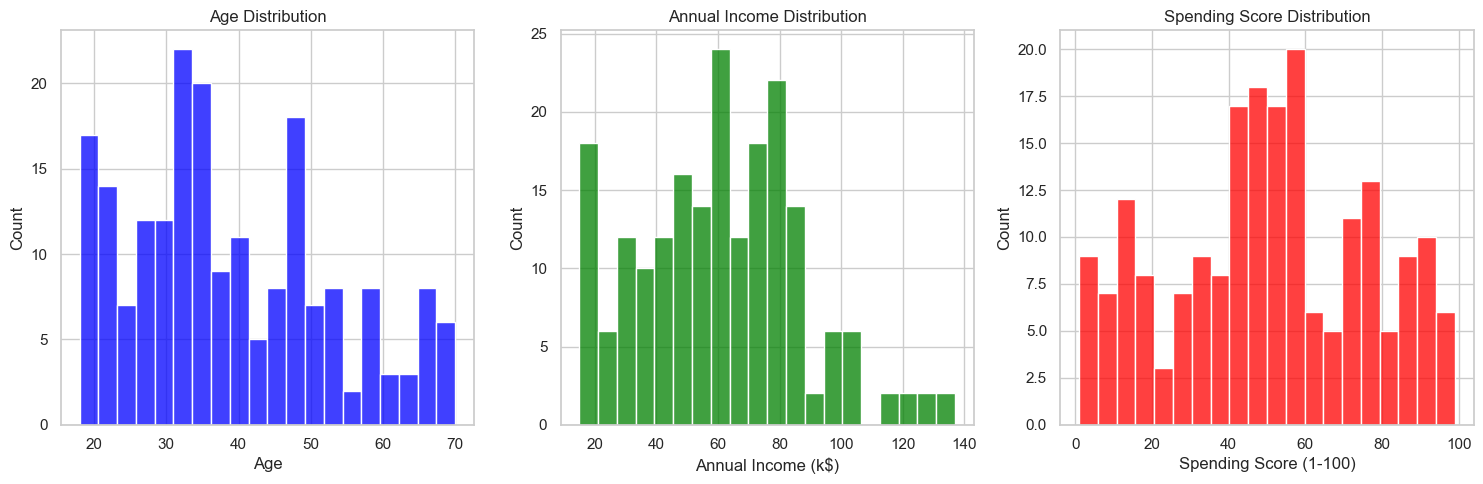

In [119]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, color='green')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

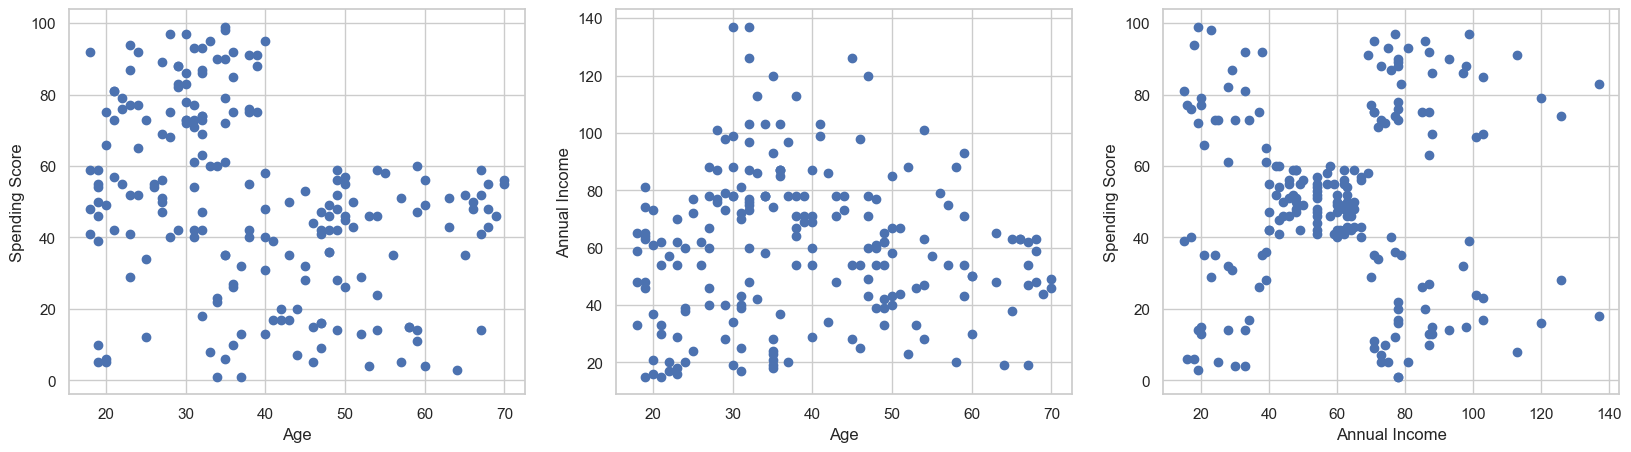

In [120]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
# plt.show()

plt.subplot(1, 3, 2)
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
# plt.show()

plt.subplot(1, 3, 3)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# plt.tight_layout()
plt.show()

In [121]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

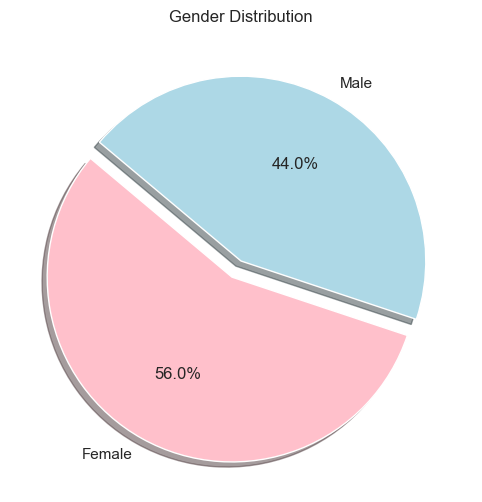

In [122]:
gender_counts = df["Gender"].value_counts().reset_index()
myexplode = [0.2, 0]

plt.figure(figsize=(10, 6))
plt.pie(gender_counts["count"],labels=gender_counts["Gender"], autopct='%1.1f%%', startangle=140, shadow=True, colors=[ "pink", "lightblue"], explode= [0.1, 0])
plt.title('Gender Distribution')

plt.show()

### Correlation Analysis

In [123]:
df_ca = df.drop('CustomerID', axis=1) #CustomerId is not needed in the analysis

In [124]:
df_ca['Gender'].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [125]:
# Convert 'Gender' column to a numerical representation
df_ca['Gender_Encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Drop the original 'Gender' column
df_ca = df.drop('Gender', axis=1)

#### Calculate the correlation matrix

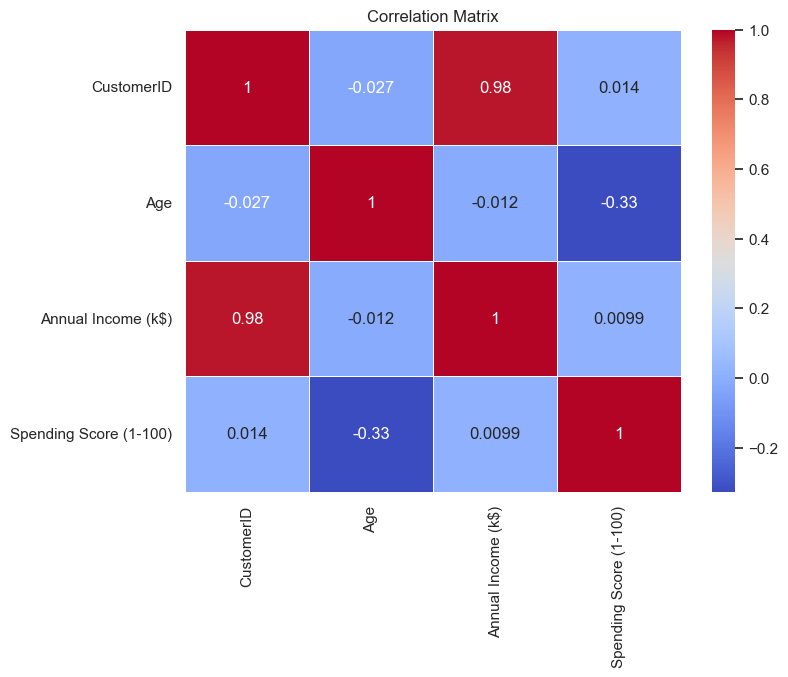

In [126]:
correlation_matrix = df_ca.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix provides insights into the relationships between the variables:

Age vs. Spending Score: There is a moderate negative correlation (-0.327) between age and spending score, suggesting that younger customers tend to have higher spending scores.

Annual Income vs. Other Variables: The correlations between annual income and other variables are relatively weak, indicating that income does not strongly predict age, spending score, or gender.

Gender vs. Spending Score: A slight positive correlation (0.058) suggests that gender may have a minor influence on spending scores, although the relationship is not strong.

### Box Plots for Outlier Detection

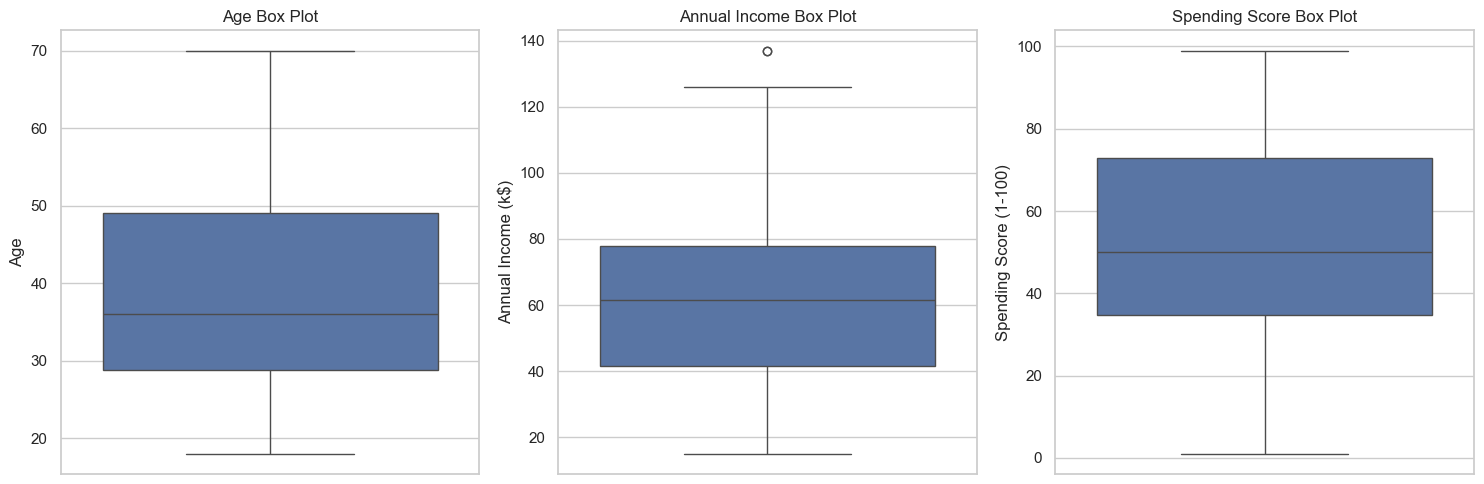

In [127]:
# Plot box plots for numerical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['Age'])
plt.title('Age Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(df['Spending Score (1-100)'])
plt.title('Spending Score Box Plot')

plt.tight_layout()
plt.show()


An outlier was detected in the annual income data, with some customers earning above $130k. Outliers can significantly impact the performance of clustering algorithms, especially those based on distance measures. It's important to consider how these outliers are handled in the analysis.

# Creating Model

### Elbow Method

In [128]:
# Selecting relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

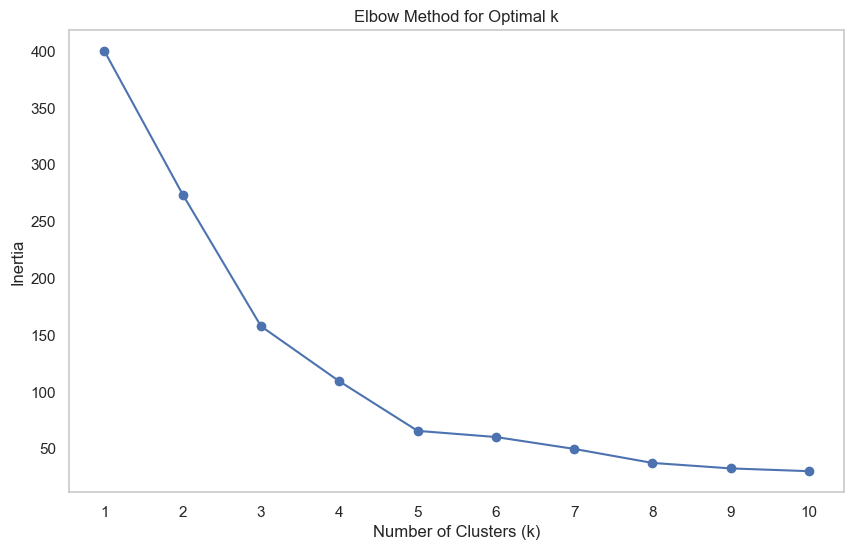

In [130]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

### Silhouette Score Method

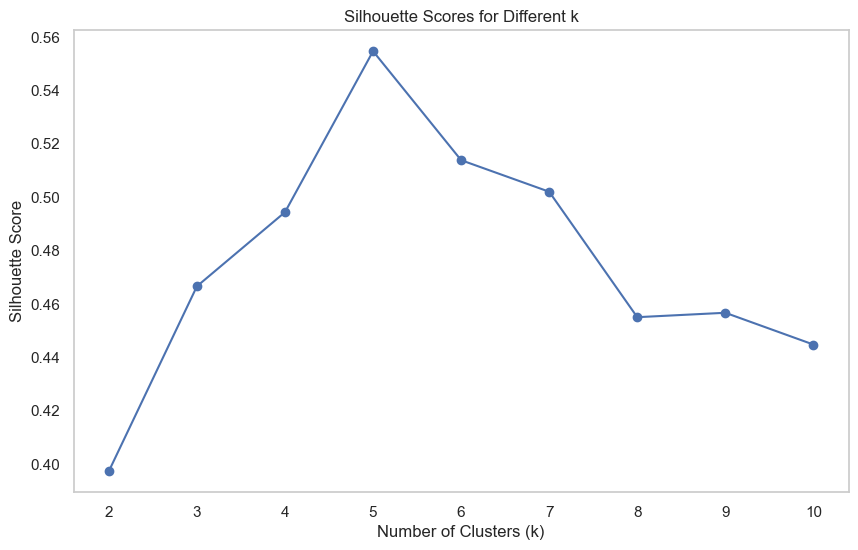

0.44475993501732874


In [131]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_values[1:]:  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values[1:])
plt.grid()
plt.show()

print(score)

In [132]:
# Applying KMeans to the dataset
optimal_clusters = 5  # Set this based on the elbow method result
kmeans = KMeans(n_clusters = optimal_clusters, random_state = 42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

df


   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                  15                      39        4
1           2                  15                      81        2
2           3                  16                       6        4
3           4                  16                      77        2
4           5                  17                      40        4


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


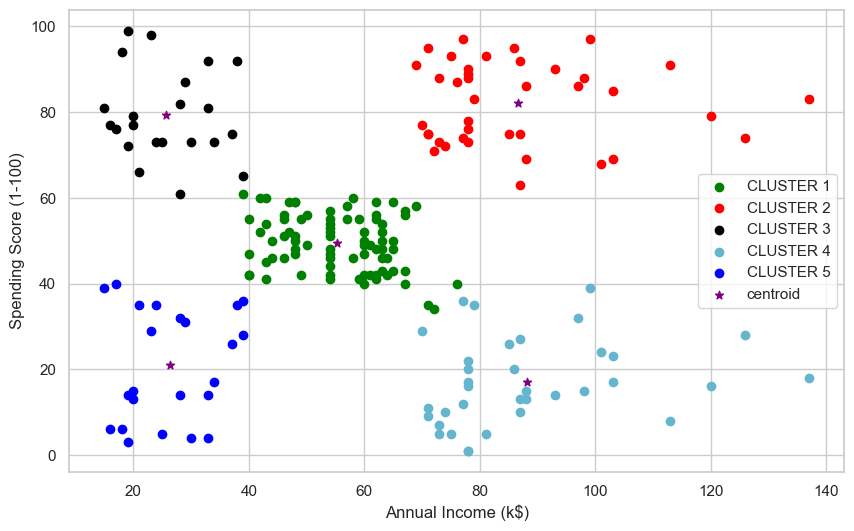

In [138]:
df1 = df[df.Cluster==0] 
df2 = df[df.Cluster==1] 
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
df5 = df[df.Cluster==4]


plt.figure(figsize=(10,6))
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green', label='Cluster 1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red', label= "Cluster 2")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black', label= "Cluster 3")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='c', label= "Cluster 4")
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='blue', label= "Cluster 5")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*',label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

### Cluster Centers
The cluster centers provide the mean values of the features for each cluster, giving us a profile of the typical customer in each group:

Cluster 1: Younger customers (mean age 28) with average income ($60k) and higher spending scores (~68), predominantly encoded as male.

Cluster 2: Similar to Cluster 0 but with slightly higher spending scores (~71), predominantly encoded as female.

Cluster 3: Older customers (mean age 48) with lower income ($46k) and moderate spending scores (~39), predominantly encoded as male.

Cluster 4: Older customers (mean age 55) with similar income to Cluster 2 ($48k) and lower spending scores (~38), predominantly encoded as female.

Cluster 5: Middle-aged customers (mean age 40) with higher income ($90k) but much lower spending scores (~15), mixed gender.
Visualization: Customer Segmentation Based on Annual Income and

### Spending Score
The scatter plot visually represents customer segmentation, with color-coded clusters based on their annual income and spending score. The plot reveals distinct groups, with some overlap, particularly in the middle-income range. This visualization helps stakeholders quickly grasp the differences between customer segments.



# Summary of Findings
Customer Segmentation: Five distinct customer segments were identified based on age, income, spending score, and gender.
Cluster Characteristics: The clusters vary significantly in age, income, and spending behavior, with notable differences in gender distribution.

# Recommendations

*Targeted Marketing:*

High Income, Low Spending (Cluster 4): Consider marketing strategies that encourage higher spending, such as exclusive promotions or loyalty programs.

Young, High Spending (Clusters 0 and 1): Focus on maintaining engagement and offering value-added services or products that align with their spending habits.

*Product Development:*

Develop products or services tailored to the specific needs of each segment, particularly those with distinct spending behaviors or income levels.

*Customer Retention:*

For clusters with lower spending scores, explore opportunities to increase customer engagement and spending, potentially through personalized offers or improved customer experience.